# Importar pacotes

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Carregar modelo pré-treinado (tensorflow hub - magenta/arbitrary-image-stylization-v1-256) #

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Definir função para carregar e pré-processar as imagens
* 0. carregar a imagem usando o tensorflow
* 1. decodificar a imagem certificando que ela tenha 3 canais
* 2. reformatar a imagem para o formato float32
* 3. adicionar um novo eixo porque o modelo espera que esteja dentro de sua própria matriz
* 4. saída da função: a imagem

In [3]:
def carrega_imagem(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

# carregar as imagens de estilo e a que será aplicado o estilo, chamando a funçao carrega_imagem

In [4]:
imagem_aplicada = carrega_imagem('f1car.jfif')
imagem_estilo = carrega_imagem('van-gogh.jpg')

# Visualizar a saída

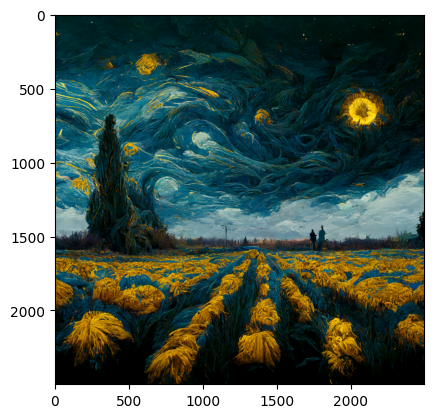

In [5]:
plt.imshow(np.squeeze(imagem_estilo)) # np.squeeze para pegar a imagem dentro da matriz
plt.show()

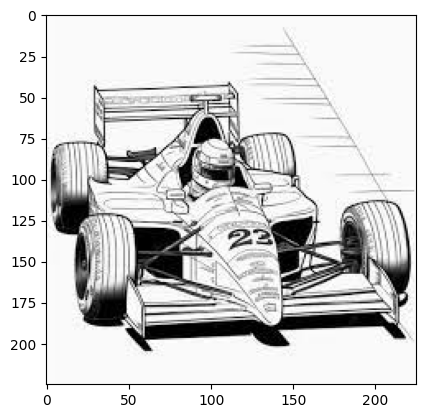

In [6]:
plt.imshow(np.squeeze(imagem_aplicada)) # np.squeeze para pegar a imagem dentro da matriz
plt.show()

# Estilizando a imagem

In [7]:
# [0] -> para extrair o primeiro resultado
imagem_estilizada = model(tf.constant(imagem_aplicada), tf.constant(imagem_estilo))[0]

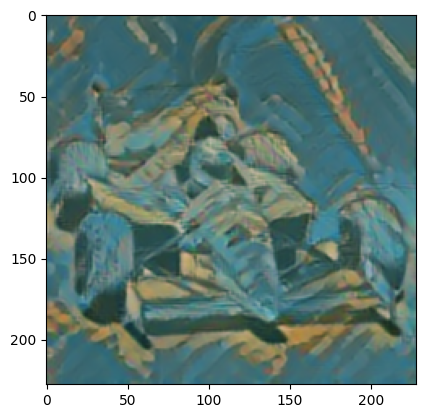

In [8]:
plt.imshow(np.squeeze(imagem_estilizada))
plt.show()

# Exportar a imagem

In [10]:
cv2.imwrite('imagem_gerada.jpg', cv2.cvtColor(np.squeeze(imagem_estilizada)*255, cv2.COLOR_BGR2RGB))

True